## Statistics for Value Mappings

In [1]:
import pandas as pd
from gdc_utils import get_gdc_data
from value_matcher import TFIDFMatcher, EmbeddingMatcher, EditMatcher, LLMMatcher
from value_matcher_interface import MatcherInterface

/Users/rlopez/opt/anaconda3/envs/askem/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
column_mapping = {
    #"Proteomics_Participant_ID": "case_submitter_id",
    #"Age": "age_at_diagnosis",
    "Gender": "gender",
    "Race": "race",
    "Ethnicity": "ethnicity",
    #"(none)": "(none)",
    "Histologic_Grade_FIGO": "tumor_grade",
    "tumor_Stage-Pathological": "ajcc_pathologic_stage",
    "Path_Stage_Reg_Lymph_Nodes-pN": "ajcc_pathologic_n",
    "Path_Stage_Primary_Tumor-pT": "ajcc_pathologic_t",
    "Tumor_Focality": "tumor_focality",
    #"Tumor_Size_cm": "tumor_largest_dimension_diameter",
    "Tumor_Site": "tissue_or_organ_of_origin",
    "Histologic_type": "morphology",
    #"Case_excluded": "(none)"
}

gdc_data = get_gdc_data(column_mapping.values())
dataset = pd.read_csv('../data/use_case1/dou.csv')
dataset = dataset[column_mapping.keys()]

### Dataset

In [3]:
dataset.head()

,Gender,Race,Ethnicity,Histologic_Grade_FIGO,tumor_Stage-Pathological,Path_Stage_Reg_Lymph_Nodes-pN,Path_Stage_Primary_Tumor-pT,Tumor_Focality,Tumor_Site,Histologic_type
0,Female,White,Not-Hispanic or Latino,FIGO grade 1,Stage I,pN0,pT1a (FIGO IA),Unifocal,Anterior endometrium,Endometrioid
1,Female,White,Not-Hispanic or Latino,FIGO grade 1,Stage IV,pNX,pT1a (FIGO IA),Unifocal,Posterior endometrium,Endometrioid
2,Female,White,Not-Hispanic or Latino,FIGO grade 2,Stage I,pN0,pT1a (FIGO IA),Unifocal,"Other, specify",Endometrioid
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carcinosarcoma
4,Female,White,Not-Hispanic or Latino,FIGO grade 2,Stage I,pNX,pT1a (FIGO IA),Unifocal,"Other, specify",Endometrioid


### Dataset Values

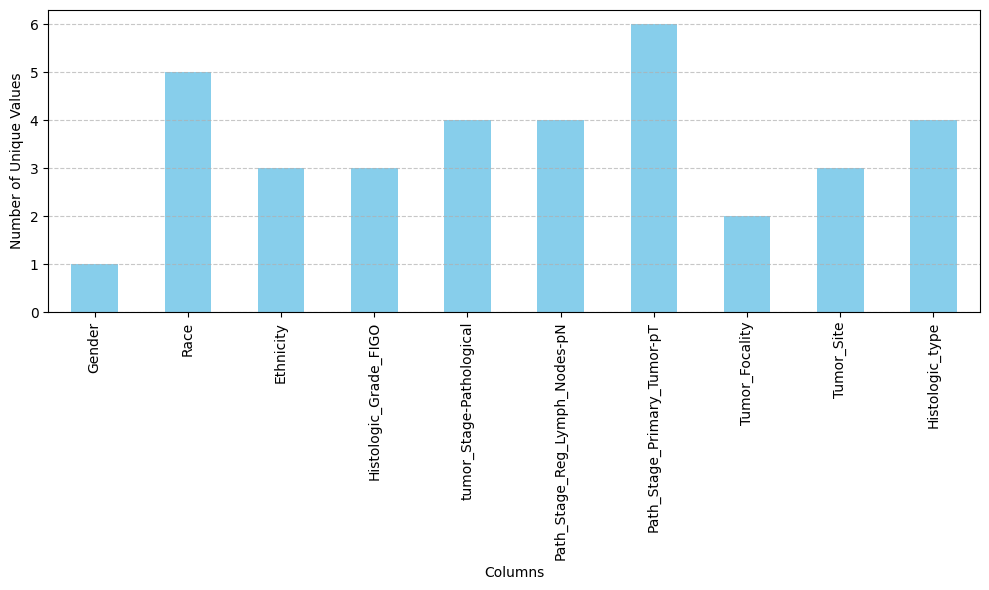

In [4]:
matcher = EditMatcher()
matcher_interface = MatcherInterface(matcher, dataset, column_mapping, gdc_data)
matcher_interface.plot_unique_values()

### Mappings Comparison

#### Edit Distance Matcher

In [5]:
matcher = EditMatcher()
matcher_interface = MatcherInterface(matcher, dataset, column_mapping, gdc_data)
matcher_interface.calculate_coverage()

Column Race: 80.00%
Column tumor_Stage-Pathological: 80.00%
Column Histologic_Grade_FIGO: 75.00%
Column Tumor_Focality: 66.67%
Column Gender: 50.00%
Column Ethnicity: 50.00%
Column Tumor_Site: 50.00%
Column Path_Stage_Reg_Lymph_Nodes-pN: 40.00%
Column Histologic_type: 20.00%
Column Path_Stage_Primary_Tumor-pT: 14.29%
Total: 52.60%


In [6]:
matcher_interface.match_values()

Column Race:
| Current Value             | Target Value              | Similarity   |
|---------------------------+---------------------------+--------------|
| White                     | white                     | 1.0          |
| Asian                     | asian                     | 1.0          |
| Not Reported              | not reported              | 1.0          |
| Black or African American | black or african american | 1.0          |
| nan                       | -                         | -            | 

Column tumor_Stage-Pathological:
| Current Value   | Target Value   | Similarity   |
|-----------------+----------------+--------------|
| Stage I         | Stage I        | 1.0          |
| Stage IV        | Stage IV       | 1.0          |
| Stage III       | Stage III      | 1.0          |
| Stage II        | Stage II       | 1.0          |
| nan             | -              | -            | 

Column Histologic_Grade_FIGO:
| Current Value   | Target Value   | Similari

#### TFIDF Matcher

In [7]:
matcher = TFIDFMatcher()
matcher_interface = MatcherInterface(matcher, dataset, column_mapping, gdc_data)
matcher_interface.calculate_coverage()

Column Race: 80.00%
Column tumor_Stage-Pathological: 80.00%
Column Tumor_Focality: 66.67%
Column Gender: 50.00%
Column Ethnicity: 50.00%
Column Tumor_Site: 50.00%
Column Histologic_Grade_FIGO: 0.00%
Column Path_Stage_Reg_Lymph_Nodes-pN: 0.00%
Column Path_Stage_Primary_Tumor-pT: 0.00%
Column Histologic_type: 0.00%
Total: 37.67%


In [8]:
matcher_interface.match_values()

Column Race:
| Current Value             | Target Value              | Similarity   |
|---------------------------+---------------------------+--------------|
| White                     | white                     | 1.0          |
| Asian                     | asian                     | 1.0          |
| Not Reported              | not reported              | 1.0          |
| Black or African American | black or african american | 1.0          |
| nan                       | -                         | -            | 

Column tumor_Stage-Pathological:
| Current Value   | Target Value   | Similarity   |
|-----------------+----------------+--------------|
| Stage I         | Stage 0        | 1.0          |
| Stage IV        | Stage 0        | 1.0          |
| Stage III       | Stage III      | 1.0          |
| Stage II        | Stage 0        | 1.0          |
| nan             | -              | -            | 

Column Tumor_Focality:
| Current Value   | Target Value   | Similarity   |


#### Embedding Matcher

In [9]:
matcher = EmbeddingMatcher ()
matcher_interface = MatcherInterface(matcher, dataset, column_mapping, gdc_data)
matcher_interface.calculate_coverage()

Column Race: 80.00%
Column tumor_Stage-Pathological: 80.00%
Column Tumor_Focality: 66.67%
Column Gender: 50.00%
Column Ethnicity: 50.00%
Column Histologic_Grade_FIGO: 0.00%
Column Path_Stage_Reg_Lymph_Nodes-pN: 0.00%
Column Path_Stage_Primary_Tumor-pT: 0.00%
Column Tumor_Site: 0.00%
Column Histologic_type: 0.00%
Total: 32.67%


In [10]:
matcher_interface.match_values()

Column Race:
| Current Value             | Target Value              | Similarity   |
|---------------------------+---------------------------+--------------|
| White                     | white                     | 1.0          |
| Asian                     | asian                     | 1.0          |
| Not Reported              | not reported              | 1.0          |
| Black or African American | black or african american | 1.0          |
| nan                       | -                         | -            | 

Column tumor_Stage-Pathological:
| Current Value   | Target Value   | Similarity   |
|-----------------+----------------+--------------|
| Stage I         | Stage I        | 1.0          |
| Stage IV        | Stage IV       | 1.0          |
| Stage III       | Stage III      | 1.0          |
| Stage II        | Stage II       | 1.0          |
| nan             | -              | -            | 

Column Tumor_Focality:
| Current Value   | Target Value   | Similarity   |


#### LLM Matcher

In [11]:
matcher = LLMMatcher()
matcher_interface = MatcherInterface(matcher, dataset, column_mapping, gdc_data)

In [12]:
matcher_interface.calculate_coverage()

Column Gender: 100.00%
Column Race: 100.00%
Column Histologic_Grade_FIGO: 100.00%
Column tumor_Stage-Pathological: 100.00%
Column Path_Stage_Reg_Lymph_Nodes-pN: 100.00%
Column Path_Stage_Primary_Tumor-pT: 100.00%
Column Tumor_Focality: 100.00%
Column Tumor_Site: 100.00%
Column Histologic_type: 100.00%
Column Ethnicity: 75.00%
Total: 97.50%


In [13]:
matcher_interface.match_values()

Column Gender:
| Current Value   | Target Value   |   Similarity |
|-----------------+----------------+--------------|
| Female          | female         |            1 |
| nan             | unknown        |            1 | 

Column Race:
| Current Value             | Target Value              |   Similarity |
|---------------------------+---------------------------+--------------|
| White                     | white                     |            1 |
| nan                       | not reported              |            1 |
| Asian                     | asian                     |            1 |
| Not Reported              | not reported              |            1 |
| Black or African American | black or african american |            1 | 

Column Histologic_Grade_FIGO:
| Current Value   | Target Value   |   Similarity |
|-----------------+----------------+--------------|
| FIGO grade 1    | G1             |            1 |
| FIGO grade 2    | G2             |            1 |
| nan      